Plot MC chains for simulations on Pokec in order to illustrate the burn-in time.

Created on: 07/12/20

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from matplotlib.lines import Line2D

In [2]:
beta_f=8.0
gradient=1.0  #10.0

graph = nx.read_graphml('Data/Bratislava_graph.graphml')

# Random initial conditions:
# data=pd.read_csv(f"Data/mc_chain_examples/random_init_chain_data_beta_{beta_f}_g_{gradient}".replace(".","-") + ".csv")
# Negative aligned initial conditions:

init_type = 'pos' 
pos_data=pd.read_csv(f"Data/mc_chain_examples/{init_type}_init_chain_data_beta_{beta_f}_g_{gradient}".replace(".","-") + ".csv")

init_type = 'random'
random_data=pd.read_csv(f"Data/mc_chain_examples/{init_type}_init_chain_data_beta_{beta_f}_g_{gradient}".replace(".","-") + ".csv")

init_type= 'neg'
neg_data=pd.read_csv(f"Data/mc_chain_examples/{init_type}_init_chain_data_beta_{beta_f}_g_{gradient}".replace(".","-") + ".csv")

FileNotFoundError: [Errno 2] File b'Data/mc_chain_examples/pos_init_chain_data_beta_8-0_g_1-0.csv' does not exist: b'Data/mc_chain_examples/pos_init_chain_data_beta_8-0_g_1-0.csv'

In [3]:
#To do: make the full plot the inset.
# i.e. show zoomed in for the main plot to show robustness.
# Add average,max,min / declare stats?

#Try and use 50 in each case? i.e. so we have the same.

/home/matt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/matt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


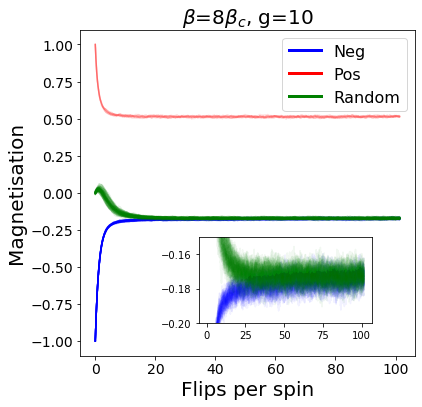

In [10]:
fig,ax=plt.subplots(figsize=(6,6))

# Positive
for chain_index in range(len(pos_data.columns)-1) :
    flips_per_spin=[ k/len(graph) for k in pos_data['timestep'].to_list()]
    plt.plot(flips_per_spin,pos_data[f'chain_{chain_index}'].to_list(),'r',alpha=0.1)
    
# Negative
for chain_index in range(len(neg_data.columns)-1) :
    flips_per_spin=[ k/len(graph) for k in neg_data['timestep'].to_list()]
    plt.plot(flips_per_spin,neg_data[f'chain_{chain_index}'].to_list(),'b',alpha=0.1)
    
# Random 
for chain_index in range(len(random_data.columns)-1) :
    flips_per_spin=[ k/len(graph) for k in random_data['timestep'].to_list()]
    plt.plot(flips_per_spin,random_data[f'chain_{chain_index}'].to_list(),'g',alpha=0.1)
    
plt.xlabel("Flips per spin",fontsize=20)
plt.ylabel("Magnetisation",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f"$\\beta$={int(beta_f)}$\\beta_c$, g={int(gradient)}",fontsize=20)

colors = ['blue', 'red', 'green']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['Neg', 'Pos', 'Random']
plt.legend(lines, labels,fontsize=16)

left, bottom, width, height = [0.4, 0.2, 0.4, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
for chain_index in range(len(neg_data.columns)-1) :
    ax2.plot(flips_per_spin,neg_data[f'chain_{chain_index}'].to_list(),'b',alpha=0.05)
for chain_index in range(len(random_data.columns)-1) :
    ax2.plot(flips_per_spin,random_data[f'chain_{chain_index}'].to_list(),'g',alpha=0.05)

ax2.set_ylim(-0.2,-0.15)

#plt.ylim(-0.20,-0.15)
plt.savefig(f"Plots/spin_burn_in_3_inits_beta_{beta_f}_g_{gradient}".replace('.','-') + ".jpg",bbox_inches='tight')
#plt.savefig(f"Plots/spin_burn_in_{init_type}_beta_{beta_f}_g_{gradient}".replace('.','-'))

### Plot for a single initial condition type

Text(0.5, 1.0, '$\\beta$=8$\\beta_c$, g=1')

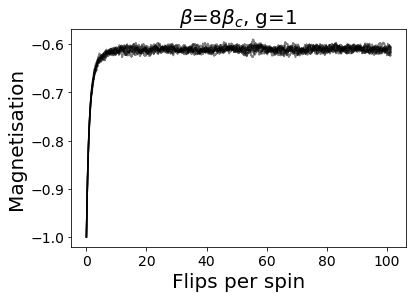

In [10]:
beta_f=8.0
gradient=1.0  #10.0

init_type = 'neg' 
data=pd.read_csv(f"Data/mc_chain_examples/{init_type}_init_chain_data_beta_{beta_f}_g_{gradient}".replace(".","-") + ".csv")

for chain_index in range(len(data.columns)-1) :
    flips_per_spin=[ k/len(graph) for k in data['timestep'].to_list()]
    plt.plot(flips_per_spin,data[f'chain_{chain_index}'].to_list(),'k',alpha=0.5)
    
plt.xlabel("Flips per spin",fontsize=20)
plt.ylabel("Magnetisation",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f"$\\beta$={int(beta_f)}$\\beta_c$, g={int(gradient)}",fontsize=20)